Выпускная квалификационная работа по курсу «Data Science Pro» МГТУ им Н. Э. Баумана

Задание:
1.	Провести разведочный анализ предложенных данных. Необходимо нарисовать гистограммы распределения каждой из переменной, диаграммы ящика с усами, попарные графики рассеяния точек. 

2.  Провести предобработку данных (удаление шумов, нормализация и т.п.)
3.  Обучить модели для прогнозных значений:

    •	Модуля упругости при растяжении, ГПа;
    
    •	Прочности при растяжении, МПа.
4.	Создать репозиторий на github.com.
5.	Написать пояснительную записку к проекту

Тема: Прогнозирование конечных свойств новых материалов (композиционных материалов). 

Описание:
Композиционные материалы — это искусственно созданные материалы, состоящие из нескольких других с четкой границей между ними. Композиты обладают теми свойствами, которые не наблюдаются у компонентов по отдельности. При этом композиты являются монолитным материалом, т.е. компоненты материала неотделимы друг от друга без разрушения конструкции в целом. Яркий пример композита — железобетон. Бетон прекрасно сопротивляется сжатию, но плохо растяжению. Стальная арматура внутри бетона компенсирует его неспособность сопротивляться сжатию, формируя тем самым новые, уникальные свойства. Современные композиты изготавливаются из других материалов: полимеры, керамика, стеклянные и углеродные волокна, но данный принцип сохраняется. У такого подхода есть и недостаток: даже если мы знаем характеристики исходных компонентов, определить характеристики композита, состоящего из этих компонентов, достаточно проблематично. Для решения этой проблемы есть два пути: физические испытания образцов материалов или прогнозирование характеристик. Суть прогнозирования заключается в симуляции представительного элемента объема композита на основе данных о характеристиках входящих компонентов (связующего и армирующего компонента).

На входе имеются данные о начальных свойствах компонентов композиционных материалов (количество связующего, наполнителя, температурный режим отверждения и т.д.). На выходе необходимо спрогнозировать ряд конечных свойств получаемых композиционных материалов. Кейс основан на реальных производственных задачах Центра НТИ «Цифровое материаловедение: новые материалы и вещества» (структурное подразделение МГТУ им. Н.Э. Баумана).


I. Разведочный анализ данных.

1.1. Предобработка данных.

Импортируем необходимые библиотеки

In [1]:
pip install sklearn.preprocessing

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for pickle


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [5]:
pip install matplotlib.pyplot

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for matplotlib.pyplot


In [6]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
# Импортирую необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import pickle


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [9]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import openpyxl

In [12]:
# Загружаем исходные данные из файла X_bp
X_bp = pd.read_excel(r"C:\Users\strokachea\Documents\Обучение\DATA SCIENCE\VKR\X_bp.xlsx", index_col=0)

In [13]:
# Получаем количество строк и столбцов
X_bp.shape

(1023, 10)

In [14]:
# Загружаем исходные данные из файла X_nup
X_nup = pd.read_excel(r"C:\Users\strokachea\Documents\Обучение\DATA SCIENCE\VKR\X_nup.xlsx", index_col=0)

In [15]:
# Получаем строки и столбцы
X_nup.shape

(1040, 3)

Выведем список признаков обоих датасетов

In [17]:
pd.DataFrame(X_bp.columns, columns=['X_bp признаки'])

X_bp признаки
0       Соотношение матрица-наполнитель
1                      Плотность, кг/м3
2                 модуль упругости, ГПа
3           Количество отвердителя, м.%
4       Содержание эпоксидных групп,%_2
5              Температура вспышки, С_2
6         Поверхностная плотность, г/м2
7  Модуль упругости при растяжении, ГПа
8         Прочность при растяжении, МПа
9               Потребление смолы, г/м2

In [18]:
pd.DataFrame(X_nup.columns, columns=['X_nup признаки'])

X_nup признаки
0  Угол нашивки, град
1         Шаг нашивки
2   Плотность нашивки

Объединим датасеты. С учетом разного количества строк (pb- 1023, nup 1040)

Объединим по индексу - метод INNER JOIN  (возвращает только те записи, у которых есть соответствующие записи в обеих объединяемых таблицах).
- Выбираются строки, у которых значения индекса (или ключа, если объединение по столбцам) присутствуют одновременно в обоих DataFrame.
- Если значения в одном из DataFrame отсутствуют, эти строки исключаются из результата.

In [21]:
# Объединяем датасеты
df = X_nup.join(X_bp, how='inner')
df.shape

(1023, 13)

In [24]:
# Сохраним данные объединенных датасетов и выведем первые 5
df.to_excel('X_nupbp_joined.xlsx')
df.head(5)

Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
0                   0          4.0               57.0   
1                   0          4.0               60.0   
2                   0          4.0               70.0   
3                   0          5.0               47.0   
4                   0          5.0               57.0   

   Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  
0                    220.0  
1                    220.0  
2                    220.0  
3                    220.0  
4                    220.0

In [25]:
# и последние строки
df.tail()

Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
1018                  90     9.076380          47.019770   
1019                  90    10.565614          53.750790   
1020                  90     4.161154          67.629684   
1021                  90     6.313201          58.261074   
1022                  90     6.078902          77.434468   

      Соотношение матрица-наполнитель  Плотность, кг/м3  \
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  
1018                    2387.292495               125.007669  
1019                    2360.392784               117.730099  
1020                    2662.906040               236.606764  
1021                    2071.715856               197.126067  
1022                    2856.328932               194.754342

In [26]:
# Проверим типы данных
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Угол нашивки, град                    1023 non-null   int64  
 1   Шаг нашивки                           1023 non-null   float64
 2   Плотность нашивки                     1023 non-null   float64
 3   Соотношение матрица-наполнитель       1023 non-null   float64
 4   Плотность, кг/м3                      1023 non-null   float64
 5   модуль упругости, ГПа                 1023 non-null   float64
 6   Количество отвердителя, м.%           1023 non-null   float64
 7   Содержание эпоксидных групп,%_2       1023 non-null   float64
 8   Температура вспышки, С_2              1023 non-null   float64
 9   Поверхностная плотность, г/м2         1023 non-null   float64
 10  Модуль упругости при растяжении, ГПа  1023 non-null   float64
 11  Прочность при растяжен

Данные 11 столбцов имеют тип float64 (число с плавающ.точкой). Столбец "Угол нашивки"  имеет тип int64 (целое число). 

In [27]:
# Проверим количество уникальных значений в каждом столбце
df.nunique()

Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
dtype: int64

In [28]:
# Проверим пропуски
df.isnull().sum()

Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
dtype: int64

Пропусков нет

In [29]:
# Проверим дубликаты строк
df.duplicated().sum()

np.int64(0)

In [30]:
# Применим описательную статистику
df.describe().T

count         mean         std  \
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   

                                              min          25%          50%  \
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   

                                              75%          max  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628

Сделаем рабочую копию объединенного датафрейма

In [31]:
df_copy = df

In [32]:
# Проверим характеристики с помощью описательной статистики
df_copy.describe().T

count         mean         std  \
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   

                                              min          25%          50%  \
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   

                                              75%          max  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628

Часть параметров имеет узкий диапазон (модуль упругости при растяжении, прочность при растяжении), возможно, могут быть предсказаны точно. Другие параметры имеют широкий, разнородный диапазон значений (например, модуль упругости, поверхностная плотность), и требуется их проверка. 


Проведем визуализацию данных (гистограммы, boxplot) для подтверждения наличия выбросов и анализа распределений.

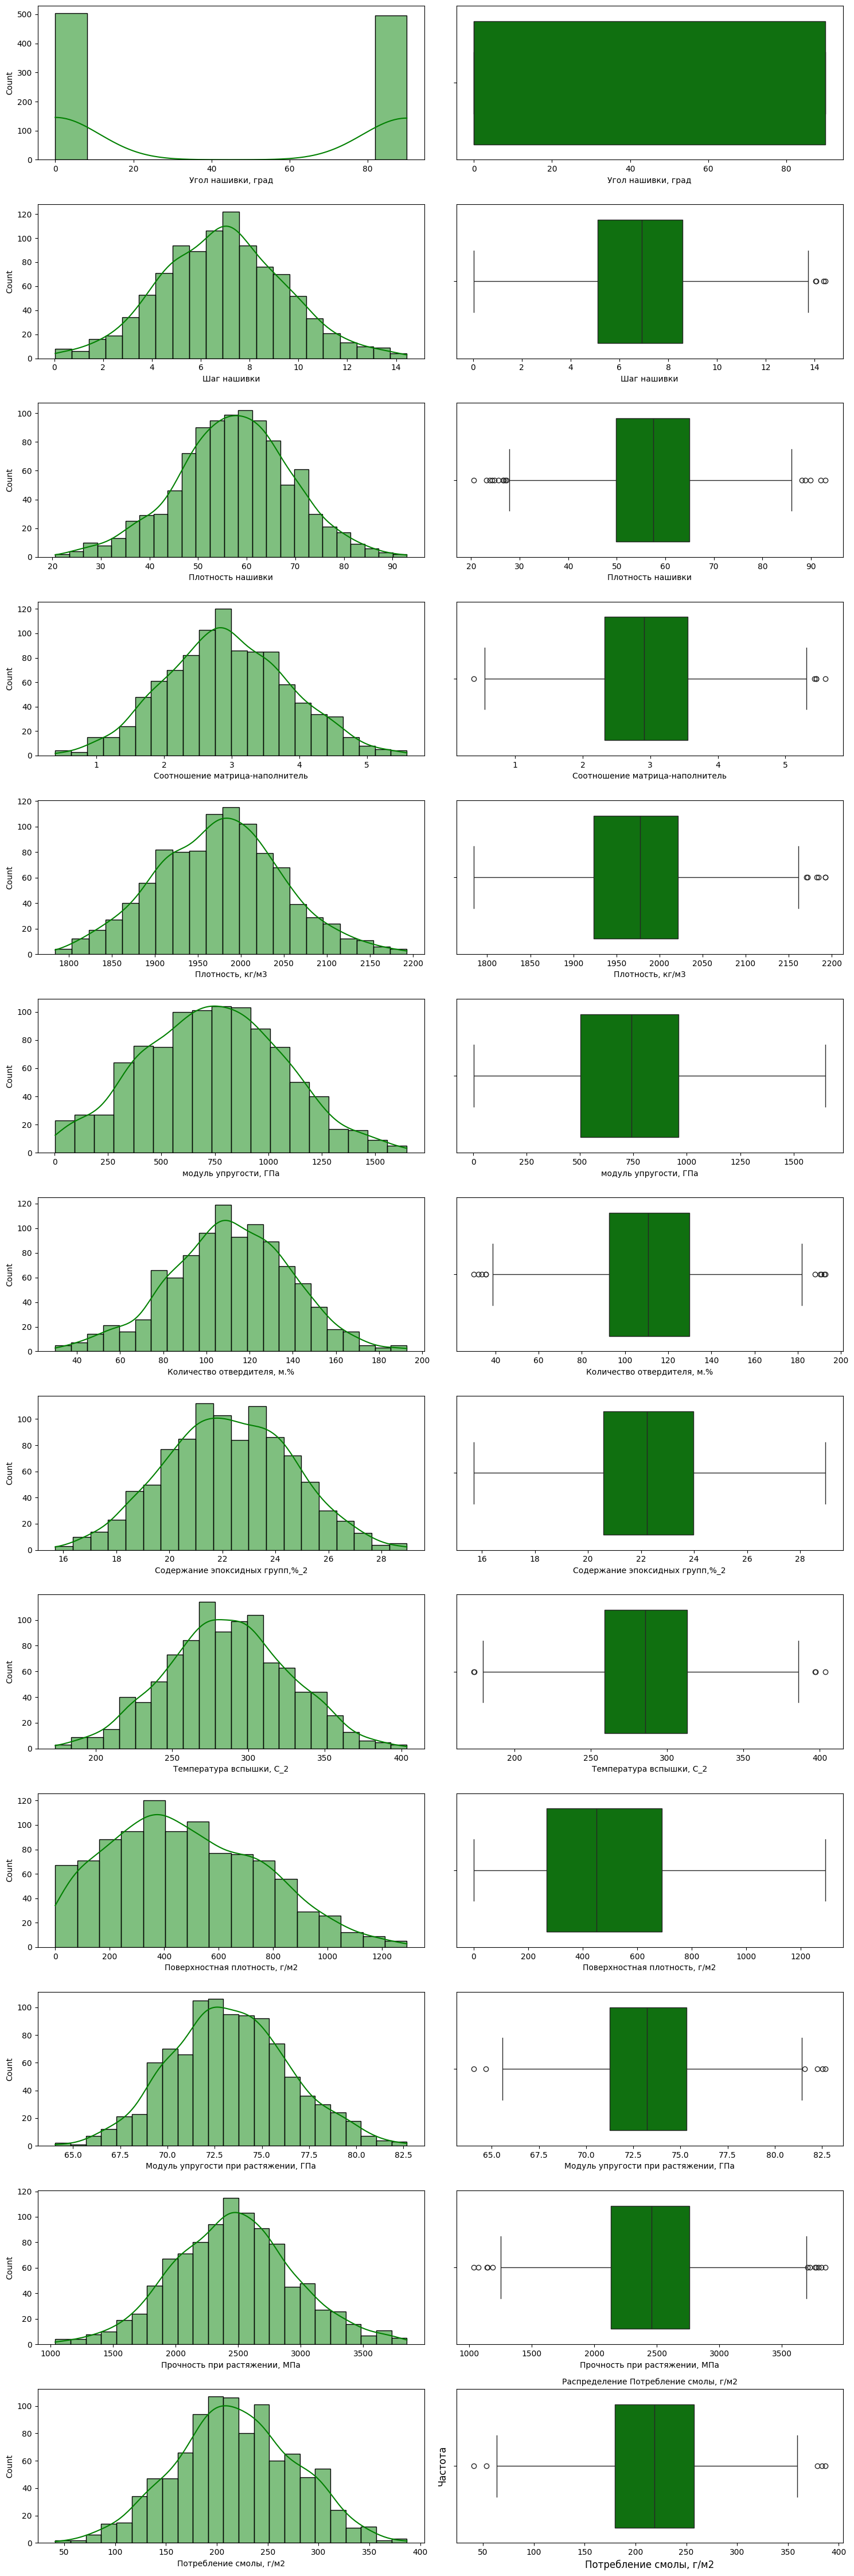

In [88]:
# Построение графиков распределения для всех столбцов
fig, axes = plt.subplots(13, 2, figsize=(15, 45)) # Общий размер представления
for i, column in enumerate(df_copy.columns):

    plt.title(f'Распределение {column}', fontsize=10)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Частота', fontsize=12)
    sns.histplot(data=df_copy, x=column, kde=True, ax=axes[i, 0],color="green")
    sns.boxplot(data=df_copy, x=column, ax=axes[i, 1], color="green")

plt.tight_layout()  # Упорядочить графики
plt.show()

Все признаки, кроме "Угол нашивки, град" имеют нормальное распределение.

Строим попарные графики рассеяния точек

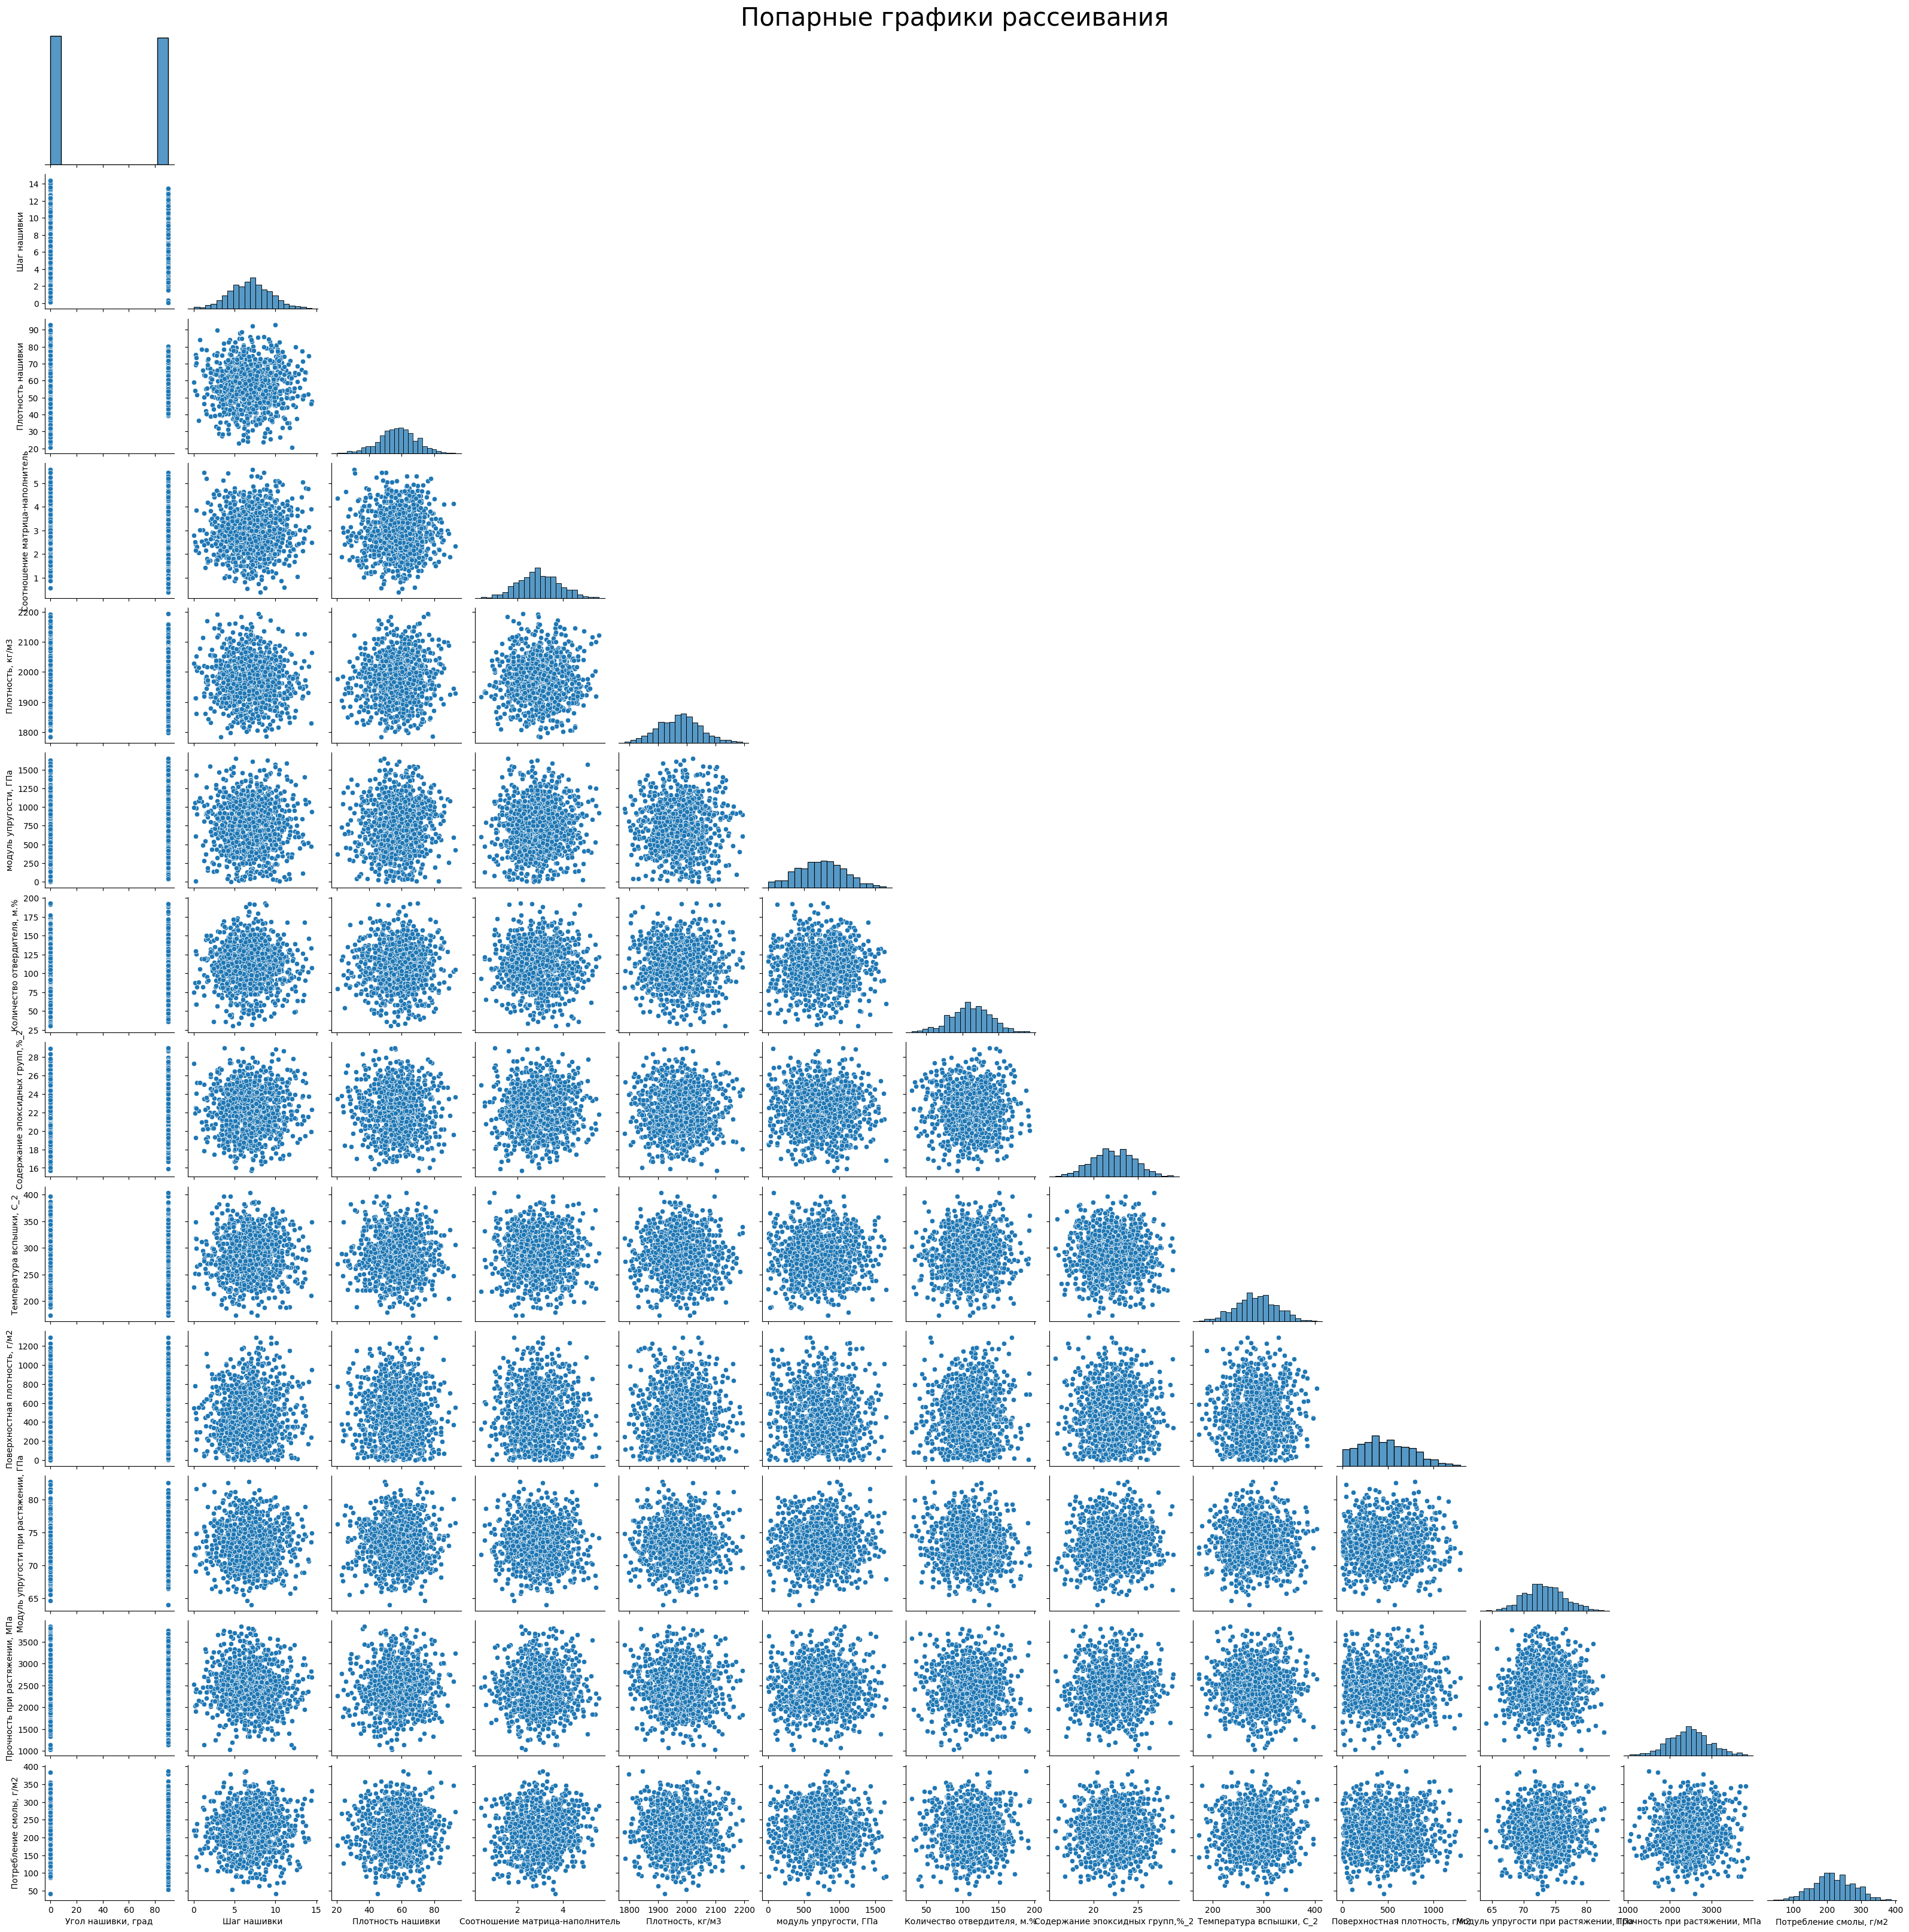

In [123]:
sns.pairplot(df_copy, diag_kind='auto', corner=True)  # corner=True исключает дублирование графиков
plt.suptitle('Попарные графики рассеивания', y=1.0, fontsize=30)
plt.show()

На графике рассеивания определяются выбросы

Найдем выбросы.
Метод Z-Score - xувствителен к выбросам, плохо работает с асимметричными данными. Хорошо работает, когда данные нормальны.

Метод IQR (межквартильного размаха)	устойчив к выбросам, подходит для данных с неравномерным распределением. Не учитывает общую структуру распределения. Применим, когда данные асимметричны.

Метод DBSCAN - применим для сложных, многомерных данных.

Метод пороговых значений - Требует ручной настройки, подходит не для всех данных.

Так как наши данные нормальны, используем метод Z-Score, и сравним с методом IQR.

In [83]:
# Функция визуализации выбросов методом IQR и Z-Score
def plot_outliers_comparison(df, columns=None):
    
    if columns is None:
        columns = [col for col in df.columns if df[col].dtype in ['float64', 'int64']]
    
    rows = len(columns)
    fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(14, 6*rows))
    fig.suptitle("Сравнение визуализации выбросов: IQR и Z-Score", fontsize=16)
    
    for i, column in enumerate(columns):
        # IQR method
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound_iqr = Q1 - 1.5 * IQR
        upper_bound_iqr = Q3 + 1.5 * IQR
        
        # Identify outliers by IQR
        iqr_outliers = ~((df[column] >= lower_bound_iqr) & (df[column] <= upper_bound_iqr))
        
        # Boxplot with IQR bounds
        sns.boxplot(y=df[column], ax=axes[i, 0], color="grey")
        sns.stripplot(y=df[column][~iqr_outliers], ax=axes[i, 0], color="green")
        sns.stripplot(y=df[column][iqr_outliers], ax=axes[i, 0], color="red")
        axes[i, 0].set_title(f"IQR: {column}", fontsize=14)
        
        # Z-Score method
        mean = df[column].mean()
        std = df[column].std()
        lower_bound_zscore = mean - 3 * std
        upper_bound_zscore = mean + 3 * std
        
        # Identify outliers by Z-Score
        z_score_outliers = ~((df[column] >= lower_bound_zscore) & (df[column] <= upper_bound_zscore))
        
        # Boxplot with Z-Score bounds
        sns.boxplot(y=df[column], ax=axes[i, 1], color="grey")
        sns.stripplot(y=df[column][~z_score_outliers], ax=axes[i, 1], color="green")
        sns.stripplot(y=df[column][z_score_outliers], ax=axes[i, 1], color="red")
        axes[i, 1].set_title(f"Z-Score: {column}", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()


In [84]:
# Подсчет выбросов методами
numeric_columns = [col for col in df_copy.columns if df_copy[col].dtype in ['float64', 'int64']]

# Метод IQR
outliers_iqr = 0
for column in numeric_columns:
    Q1 = df_copy[column].quantile(0.25)
    Q3 = df_copy[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_iqr += ((df_copy[column] < lower_bound) | (df_copy[column] > upper_bound)).sum()

# Метод Z-Score
outliers_zscore = 0
for column in numeric_columns:
    mean = df_copy[column].mean()
    std = df_copy[column].std()
    z_scores = (df_copy[column] - mean) / std
    outliers_zscore += (abs(z_scores) > 3).sum()

print(f"Сумма выбросов методом IQR: {outliers_iqr}")
print(f"Сумма выбросов методом Z-Score: {outliers_zscore}")

Сумма выбросов методом IQR: 68
Сумма выбросов методом Z-Score: 4


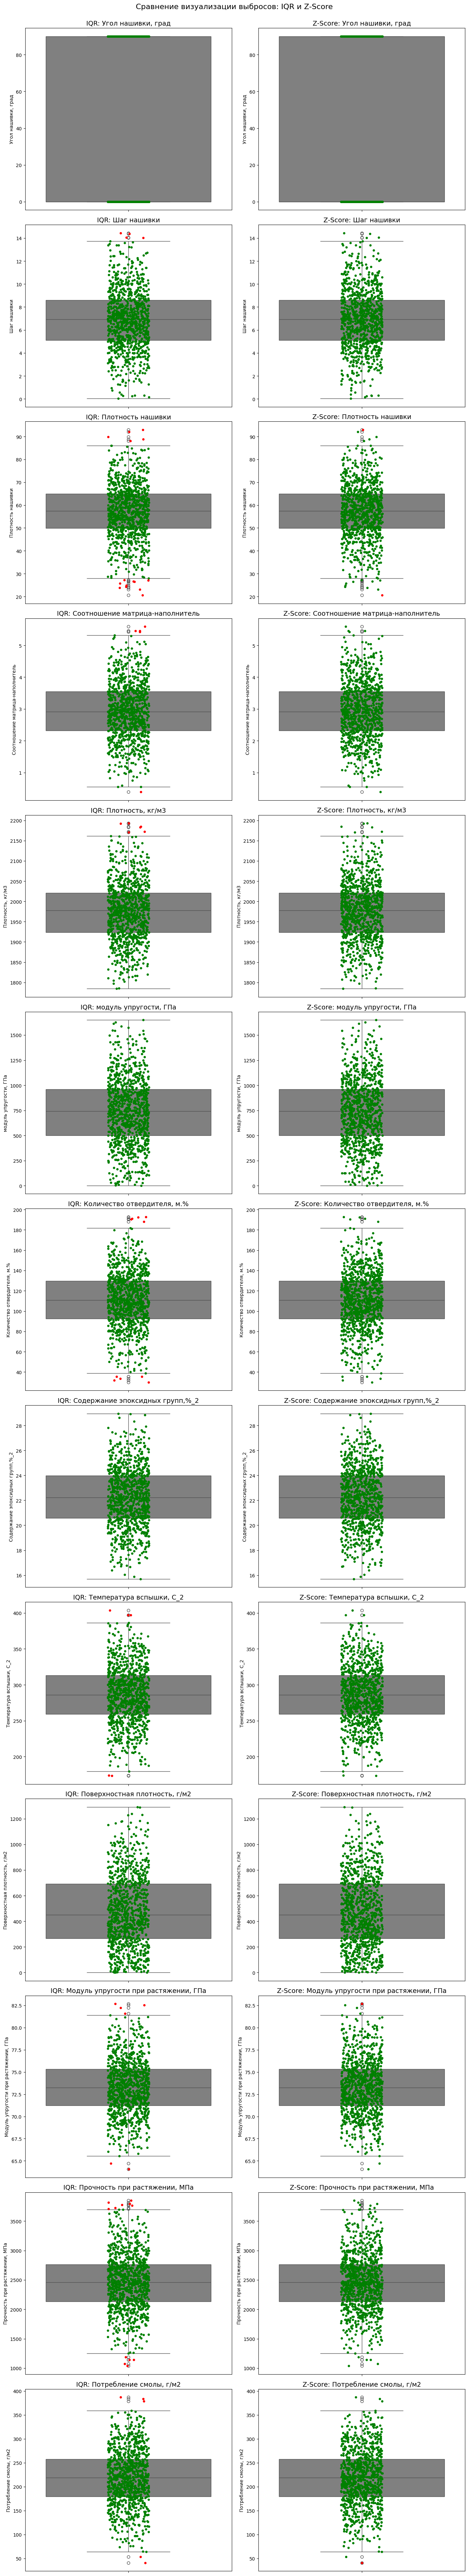

In [85]:
# Визуализация выбросов
plot_outliers_comparison(df_copy)

Поскольку изучаемые данные нормализованы и в них отсутствуют пустые значения, будем ориентроваться на метод Z-Score.

II. Предобработка данных

1. Очистим от выбросов

In [65]:
# очистим данные от выбросов
outliers = pd.DataFrame(index=df_copy.index)
for column in df_copy:
    zscore = (df_copy[column] - df_copy[column].mean()) / df_copy[column].std()
    outliers[column] = (zscore.abs() > 3)
df_copy = df_copy[outliers.sum(axis=1)==0]
df_copy.shape

(1000, 13)

Проведем корреляционный анализ данных

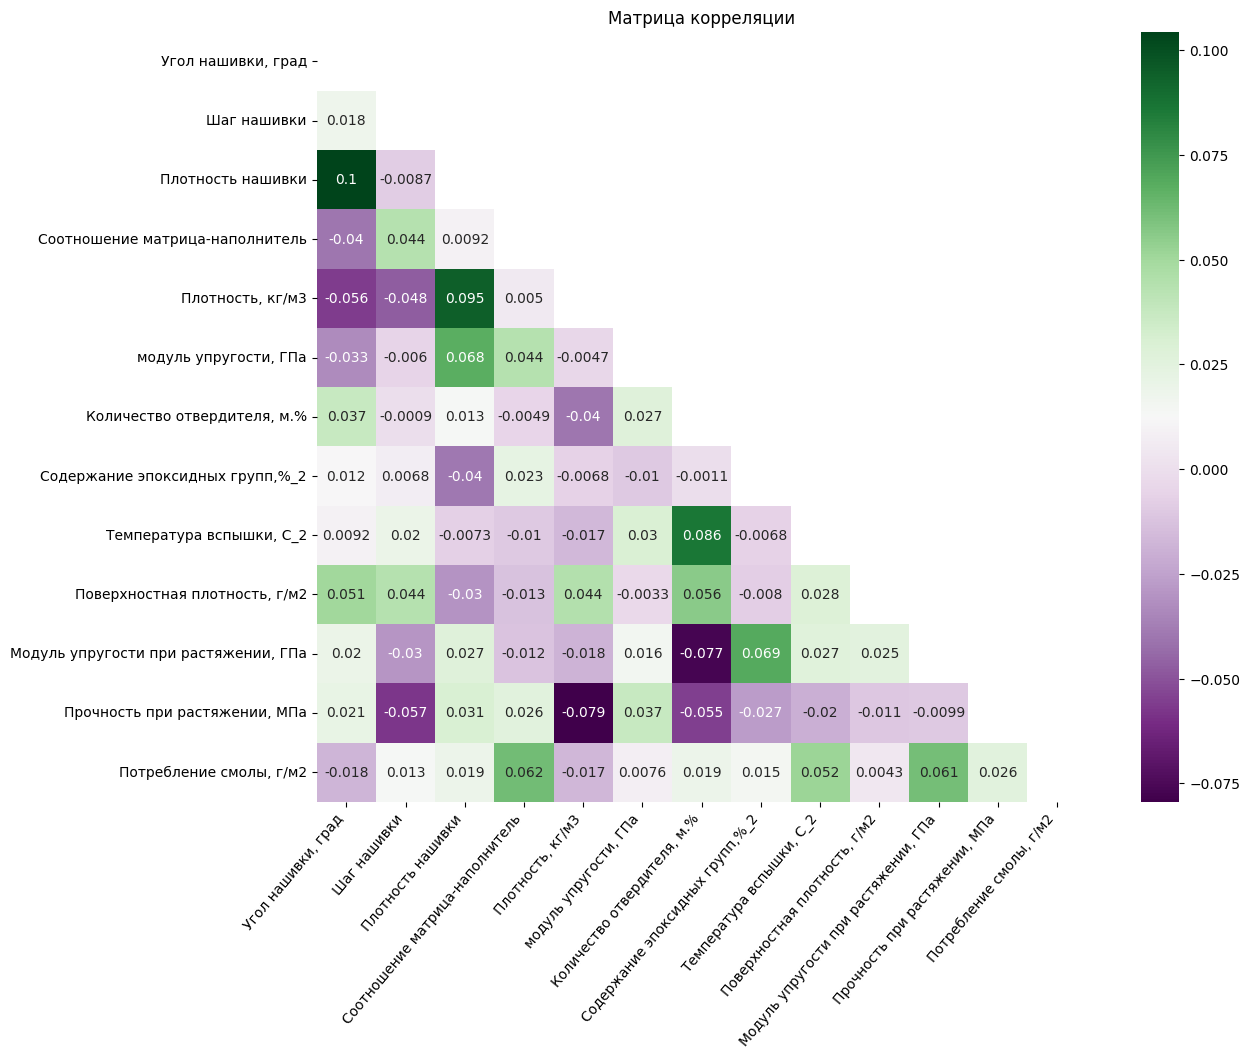

In [70]:
# Корреляционный анализ
mask = np.triu(df_copy.corr())
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(df_copy.corr(), mask=mask, annot=True, square=True, cmap='PRGn')
plt.xticks(rotation=50, ha='right')
plt.title("Матрица корреляции")
plt.show()

Определена максимальная корреляция = 0,1: между плотностью нашивки и углом нашивки равна 0,1, корреляция между остальными параметрами значительно хуже и близка к 0. Это значит, что линейной зависимости между ними отсутствуют. И линейная модель регрессии не даст приемлемого результата.

In [89]:
# Сохраним данные для последующей обработки
df_copy.to_excel('data_w.xlsx')

In [90]:
# Загрузить данные, подготовленные на предыдущем шаге
df_w = pd.read_excel('data_w.xlsx', index_col=0)

df_w

Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
1                      0     4.000000          60.000000   
3                      0     5.000000          47.000000   
4                      0     5.000000          57.000000   
5                      0     5.000000          60.000000   
6                      0     5.000000          70.000000   
...                  ...          ...                ...   
1018                  90     9.076380          47.019770   
1019                  90    10.565614          53.750790   
1020                  90     4.161154          67.629684   
1021                  90     6.313201          58.261074   
1022                  90     6.078902          77.434468   

      Соотношение матрица-наполнитель  Плотность, кг/м3  \
1                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
5                            2.767918       2000.000000   
6                            2.569620       1910.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
1                738.736842                    50.000000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
5                748.000000                   111.860000   
6                807.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1                           23.750000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
5                           22.267857                284.615385   
6                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
5                        210.000000                             70.000000   
6                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  
1                       3000.000000               220.000000  

III. Построение моделей для прогноза:
1. модуля упругости при растяжении;
2. прочности при растяжении;
3. Соотношение матрица-наполнитель

Задача:
- 30% данных оставить на тестирование модели, на остальных происходит обучение моделей.
- Провести предобработку данных (нормализация).
- При построении моделей провести поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10.
- Обучить нескольких моделей для прогноза модуля упругости при растяжении и прочности при растяжении.
- Написать нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель.

Разбиваем данные на обучающую и тестовую выборки

In [124]:
#Нормализация with MinMaxScaler

transformer = MinMaxScaler().fit(df_w)
col = df_w.columns
processed = transformer.transform(df_w)
df_w= pd.DataFrame(processed, columns = col, index=df_w.index)
df_w

Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
1                    0.0     0.275109           0.544652   
3                    0.0     0.344539           0.365074   
4                    0.0     0.344539           0.503211   
5                    0.0     0.344539           0.544652   
6                    0.0     0.344539           0.682789   
...                  ...          ...                ...   
1018                 1.0     0.627565           0.365347   
1019                 1.0     0.730963           0.458327   
1020                 1.0     0.286298           0.650046   
1021                 1.0     0.435716           0.520631   
1022                 1.0     0.419448           0.785487   

      Соотношение матрица-наполнитель  Плотность, кг/м3  \
1                            0.282131          0.601381   
3                            0.282131          0.601381   
4                            0.457857          0.601381   
5                            0.457201          0.527898   
6                            0.419084          0.307448   
...                               ...               ...   
1018                         0.361750          0.410540   
1019                         0.587163          0.650588   
1020                         0.555750          0.460227   
1021                         0.637396          0.691520   
1022                         0.657131          0.259472   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
1                  0.447061                     0.123047   
3                  0.447061                     0.608021   
4                  0.455721                     0.502800   
5                  0.452685                     0.502800   
6                  0.488508                     0.502800   
...                     ...                          ...   
1018               0.552781                     0.350139   
1019               0.268550                     0.712271   
1020               0.251612                     0.494656   
1021               0.448724                     0.684130   
1022               0.251903                     0.609147   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1                            0.607435                  0.482823   
3                            0.418887                  0.549664   
4                            0.495653                  0.482823   
5                            0.495653                  0.482823   
6                            0.495653                  0.482823   
...                               ...                       ...   
1018                         0.333908                  0.657301   
1019                         0.294428                  0.350746   
1020                         0.623085                  0.325580   
1021                         0.267818                  0.444436   
1022                         0.888354                  0.553803   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1                          0.162230                              0.319194   
3                          0.162230                              0.319194   
4                          0.162230                              0.319194   
5                          0.162230                              0.319194   
6                          0.162230                              0.319194   
...                             ...                                   ...   
1018                       0.161609                              0.485125   
1019                       0.271207                              0.475992   
1020                       0.572959                              0.573346   
1021                       0.496511                              0.536217   
1022                       0.587373                              0.550550   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  
1                          0.698235                 0.517418  

In [125]:
# Данные без "Модуль упругости при растяжении, ГПа"
X1 = df_w.drop(columns=['Модуль упругости при растяжении, ГПа'])
y1 = df_w['Модуль упругости при растяжении, ГПа']

# Данные без "Прочность при растяжении, ГПа"
X2 = df_w.drop(columns=['Прочность при растяжении, МПа'])
y2 = df_w['Прочность при растяжении, МПа']

# Данные без "Соотношение матрица-наполнитель"
X3 = df_w.drop(columns=['Соотношение матрица-наполнитель'])
y3 = df_w['Соотношение матрица-наполнитель']

Выбор модели для модуля 1 - Модуль упругости при растяжении, ГПа

метод Случайный лес

In [126]:
def preprocess_data(X):
    # Создаем объект StandardScaler
    scaler = StandardScaler()
    
    # Подгоняем скейлер под данные и преобразуем их
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled

In [129]:
# Разделяем на тренировочную и тестовую выборку
x1_train, x1_test, y1_train, y1_test = train_test_split(preprocess_data(X1), y1, test_size=0.3, random_state=42)

print('x1_train:', x1_train.shape, 'y1_train:', y1_train.shape)
print('x1_test:', x1_test.shape, 'y1_test:', y1_test.shape)

x1_train: (700, 12) y1_train: (700,)
x1_test: (300, 12) y1_test: (300,)


In [130]:
# Обучаем модель для X1
rf1 = RandomForestRegressor(n_estimators=100, random_state=42)
rf1.fit(x1_train, y1_train)

# Предсказания и оценки для X1
y1_pred = rf1.predict(x1_test)
mae1_1 = mean_absolute_error(y1_test, y1_pred)
mse1_1 = mean_squared_error(y1_test, y1_pred)
r21_1 = r2_score(y1_test, y1_pred)

print("Результаты для модели без 'Модуль упругости при растяжении, ГПа':")
print(f"MAE: {mae1_1}, MSE: {mse1_1}, R²: {r21_1}")

Результаты для модели без 'Модуль упругости при растяжении, ГПа':
MAE: 0.1382797183615766, MSE: 0.029764515475255753, R²: -0.09518356299610575


Модель работает плохо. Высокие значения MAE и MSE, высокий коэффициент детерминации указывают на плохую предсказательную возможность

K-ближайших соседей (K-Nearest Neighbors, KNN)

In [131]:
# Обучаем модель для X1
knn1 = KNeighborsRegressor(n_neighbors=5)  # Классический параметр k=5
knn1.fit(x1_train, y1_train)

# Предсказания и оценки для X1
y1_pred = knn1.predict(x1_test)
mae1_2 = mean_absolute_error(y1_test, y1_pred)
mse1_2 = mean_squared_error(y1_test, y1_pred)
r21_2 = r2_score(y1_test, y1_pred)

print("Результаты для модели без 'Модуль упругости при растяжении, ГПа':")
print(f"MAE: {mae1_2}, MSE: {mse1_2}, R²: {r21_2}")

Результаты для модели без 'Модуль упругости при растяжении, ГПа':
MAE: 0.14425120113428438, MSE: 0.03200488730053483, R²: -0.17761791003209226


Показатели модели неудовлетворительные: отрицательное значение коэффициента детерминации и увеличенное значение MSE 

Модель с поддерживающими векторами (Support Vector Regression, SVR)

In [132]:
# Обучаем модель для X1 (Прочность при растяжении, ГПа)
svr1 = SVR(kernel='rbf')  # Радиальное базисное ядро
svr1.fit(x1_train, y1_train)

# Предсказания и оценки для X1
y1_pred = svr1.predict(x1_test)
mae1_3 = mean_absolute_error(y1_test, y1_pred)
mse1_3 = mean_squared_error(y1_test, y1_pred)
r21_3 = r2_score(y1_test, y1_pred)

print("Результаты для модели без 'Модуль упругости при растяжении, ГПа':")
print(f"MAE: {mae1_3}, MSE: {mse1_3}, R²: {r21_3}")

Результаты для модели без 'Модуль упругости при растяжении, ГПа':
MAE: 0.15405502656538972, MSE: 0.037427127737845615, R²: -0.3771289219446612


Удовлетворительная точность по показателю MAE, но низкая точность по MSE и отрицательный коэффициент детерминации - плохая модель

Метод GradientBoostingRegressor

In [133]:
# Обучаем модель для X1 (Прочность при растяжении, ГПа)
gbr1 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr1.fit(x1_train, y1_train)

# Предсказания и оценки для X1
y1_pred = gbr1.predict(x1_test)
mae1_4 = mean_absolute_error(y1_test, y1_pred)
mse1_4 = mean_squared_error(y1_test, y1_pred)
r21_4 = r2_score(y1_test, y1_pred)

print("Результаты для модели без 'Модуль упругости при растяжении, ГПа':")
print(f"MAE: {mae1_4}, MSE: {mse1_4}, R²: {r21_4}")

Результаты для модели без 'Модуль упругости при растяжении, ГПа':
MAE: 0.1409691429700307, MSE: 0.0310776448478439, R²: -0.1435000795589736


Умеренная точность по показателю MAE, но низкая точность по MSE и отрицательный коэффициент детерминации - плохая модель

Выбор модели для модуля 2 - 'Прочность при растяжении, ГПа'

метод Случайный лес

In [134]:
# Разделяю на тренировочную и тестовую выборку
x2_train, x2_test, y2_train, y2_test = train_test_split(preprocess_data(X2), y2, test_size=0.3, random_state=42)
print('x2_train:', x2_train.shape, 'y2_train:', y2_train.shape)
print('x2_test:', x2_test.shape, 'y2_test:', y2_test.shape)

x2_train: (700, 12) y2_train: (700,)
x2_test: (300, 12) y2_test: (300,)


модель случайных лес

In [135]:
# Обучаем модель для X2
rf2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf2.fit(x2_train, y2_train)

# Предсказания и оценки для X2
y2_pred = rf2.predict(x2_test)
mae2_1 = mean_absolute_error(y2_test, y2_pred)
mse2_1 = mean_squared_error(y2_test, y2_pred)
r2_2_1 = r2_score(y2_test, y2_pred)

print("Результаты для модели без 'Прочность при растяжении, ГПа':")
print(f"MAE: {mae2_1}, MSE: {mse2_1}, R²: {r2_2_1}")

Результаты для модели без 'Прочность при растяжении, ГПа':
MAE: 0.1344595586102449, MSE: 0.02886516276874927, R²: -0.057938790827325004


Улучшение по показателям MAE и MSE, что свидетельствует о повышении точности прогнозирования.

K-ближайших соседей (K-Nearest Neighbors, KNN)

In [136]:
knn2 = KNeighborsRegressor(n_neighbors=5)
knn2.fit(x2_train, y2_train)

# Предсказания и оценки для X2
y2_pred = knn2.predict(x2_test)
mae2_2 = mean_absolute_error(y2_test, y2_pred)
mse2_2 = mean_squared_error(y2_test, y2_pred)
r22_2 = r2_score(y2_test, y2_pred)

print("Результаты для модели без 'Прочность при растяжении, ГПа':")
print(f"MAE: {mae2_2}, MSE: {mse2_2}, R²: {r22_2}")

Результаты для модели без 'Прочность при растяжении, ГПа':
MAE: 0.14493219985749467, MSE: 0.033238300712894575, R²: -0.21821892871586135


Улучшение по показателям MAE и MSE

Модель с поддерживающими векторами (Support Vector Regression, SVR)

In [137]:
# Обучаем модель для X2 (Модуль упругости при растяжении, ГПа)
svr2 = SVR(kernel='rbf')
svr2.fit(x2_train, y2_train)

# Предсказания и оценки для X2
y2_pred = svr2.predict(x2_test)
mae2_3 = mean_absolute_error(y2_test, y2_pred)
mse2_3 = mean_squared_error(y2_test, y2_pred)
r22_3 = r2_score(y2_test, y2_pred)

print("Результаты для модели без 'Прочность при растяжении, ГПа':")
print(f"MAE: {mae2_3}, MSE: {mse2_3}, R²: {r22_3}")

Результаты для модели без 'Прочность при растяжении, ГПа':
MAE: 0.1553119830350102, MSE: 0.03727914808776422, R²: -0.3663202652624764


Улучшение по показателю MAE

Метод GradientBoostingRegressor

In [138]:
# Обучаем модель для X2 (Модуль упругости при растяжении, ГПа)
gbr2 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr2.fit(x2_train, y2_train)

# Предсказания и оценки для X2
y2_pred = gbr2.predict(x2_test)
mae2_4 = mean_absolute_error(y2_test, y2_pred)
mse2_4 = mean_squared_error(y2_test, y2_pred)
r22_4 = r2_score(y2_test, y2_pred)

print("Результаты для модели без 'Прочность при растяжении, ГПа':")
print(f"MAE: {mae2_4}, MSE: {mse2_4}, R²: {r22_4}")

Результаты для модели без 'Прочность при растяжении, ГПа':
MAE: 0.13724012009442574, MSE: 0.029691257608747215, R²: -0.08821604175217712


Сравним модели


Сравнение моделей:



MAE       MSE        R2
Случайный лес (без Модуль упругости)              0.138280  0.029765 -0.095184
Случайный лес (без Прочности)                     0.134460  0.028865 -0.057939
GradientBoostingRegressor (без Модуль упругости)  0.140969  0.031078 -0.143500
GradientBoostingRegressor (без Прочность)         0.137240  0.029691 -0.088216
SVR (без Модуль упругости)                        0.154055  0.037427 -0.377129
SVR (без Прочность)                               0.155312  0.037279 -0.366320
KNN (без Модуль упругости)                        0.144251  0.032005 -0.177618
KNN (без Прочность)                               0.144932  0.033238 -0.218219

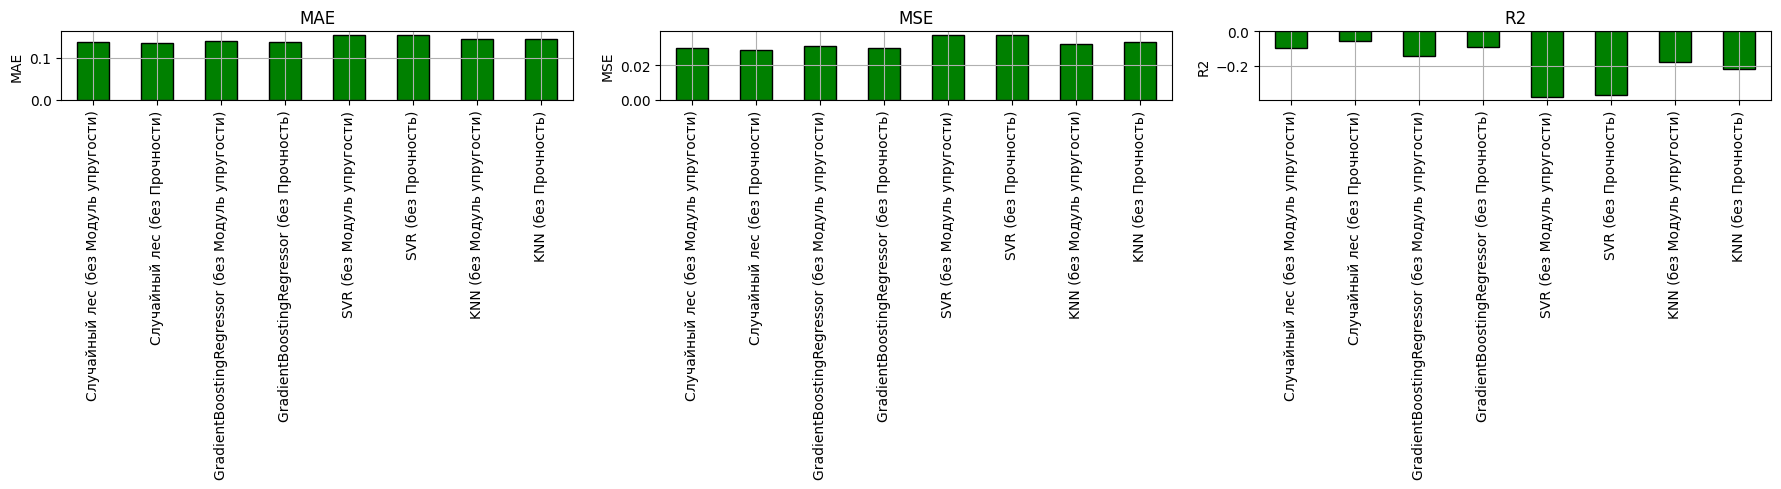

In [140]:
def compare_models(results):
    # Преобразуем результаты в DataFrame
    results_df = pd.DataFrame.from_dict(results, orient='index')
    
    # Создаем таблицу
    print("\nСравнение моделей:\n")
    display(results_df)

    # Визуализация метрик
    metrics = ["MAE", "MSE", "R2"]
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    for i, metric in enumerate(metrics):
        results_df[metric].plot(kind='bar', ax=axes[i], rot=90, color='green', edgecolor='black')
        axes[i].set_title(metric)
        axes[i].set_ylabel(metric)
        axes[i].grid(True)

    plt.tight_layout()
    plt.show()

results = {
    "Случайный лес (без Модуль упругости)": {"MAE": mae1_1, "MSE": mse1_1, "R2": r21_1},
    "Случайный лес (без Прочности)": {"MAE": mae2_1, "MSE": mse2_1, "R2": r2_2_1},
    "GradientBoostingRegressor (без Модуль упругости)": {"MAE": mae1_4, "MSE": mse1_4, "R2": r21_4},
    "GradientBoostingRegressor (без Прочность)": {"MAE": mae2_4, "MSE": mse2_4, "R2": r22_4},
    "SVR (без Модуль упругости)": {"MAE": mae1_3, "MSE": mse1_3, "R2": r21_3},
    "SVR (без Прочность)": {"MAE": mae2_3, "MSE": mse2_3, "R2": r22_3},
    "KNN (без Модуль упругости)": {"MAE": mae1_2, "MSE": mse1_2, "R2": r21_2},
    "KNN (без Прочность)": {"MAE": mae2_2, "MSE": mse2_2, "R2": r22_2}
}

compare_models(results)


Напишем функцию поиска гиперпараметров

In [143]:
def hyperparameter_search(model, param_grid, x_train, y_train, X_test, y_test):
    """
    Функция для поиска гиперпараметров с использованием GridSearchCV.

    Parameters:
    - model: Инициализированная модель.
    - param_grid: Словарь с гиперпараметрами для перебора.
    - X_train: Обучающие признаки.
    - y_train: Обучающая целевая переменная.
    - X_test: Тестовые признаки.
    - y_test: Тестовая целевая переменная.
    
    Returns:
    - best_model: Модель с оптимальными гиперпараметрами.
    - best_params: Лучшие параметры.
    - r2: Коэффициент детерминации на тестовых данных.
    """
    # Инициализация GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                               scoring='neg_mean_squared_error', cv=10, n_jobs=-1, verbose=2)
    
    # Поиск по сетке
    grid_search.fit(x_train, y_train)
    
    # Лучшие параметры и модель
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    # Прогнозируем значения на тестовых данных
    y_pred = best_model.predict(X_test)
    
    # Расчет R^2
    r2 = r2_score(y_test, y_pred)
    
    print("Лучшие параметры:", best_params)
    print("Лучший MSE на обучении:", -grid_search.best_score_)
    print("R^2 на тестовых данных:", r2)
    
    return best_model, best_params, r2


Применим эту функцию ко всем моделям

Random Forest

In [144]:
# Задаем модель и гиперпараметры
rf_model = RandomForestRegressor(random_state=42)
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Поиск гиперпараметров
best_rf_model, best_rf_params, r2 = hyperparameter_search(
    rf_model, rf_param_grid, x1_train, y1_train, x1_test, y1_test
)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Лучшие параметры: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Лучший MSE на обучении: 0.02872654266393878
R^2 на тестовых данных: -0.10563219141701352


In [146]:
best_rf_model, best_rf_params, r2  = hyperparameter_search(rf_model, rf_param_grid, x2_train, y2_train, x2_test, y2_test)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Лучшие параметры: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Лучший MSE на обучении: 0.030765885051570484
R^2 на тестовых данных: -0.03959392765792891


SVR

In [147]:
# Определение модели и сетки гиперпараметров
svr_model = SVR()
svr_param_grid = [{'kernel': ['linear'],
      'C': [0.001, 0.01, 0.02]},
    {'kernel': ['poly'],
      'C': [0.001, 0.01, 0.02]},
    {'kernel': ['rbf'],
      'gamma': ['scale', 'auto'],
      'C': [0.01, 0.05, 0.1, 0.2, 0.3]},
    {'kernel': ['sigmoid'],
      'C': [0.001, 0.01, 0.1]}]
# Поиск гиперпараметров
best_svr_model, best_svr_params, r2 = hyperparameter_search(
    svr_model, svr_param_grid, x1_train, y1_train, x1_test, y1_test)

Fitting 10 folds for each of 19 candidates, totalling 190 fits
Лучшие параметры: {'C': 0.01, 'kernel': 'sigmoid'}
Лучший MSE на обучении: 0.027760002812212203
R^2 на тестовых данных: -0.027855032139974867


In [148]:
best_svr_model, best_svr_params, r2  = hyperparameter_search(svr_model, svr_param_grid, x2_train, y2_train, x2_test, y2_test)

Fitting 10 folds for each of 19 candidates, totalling 190 fits
Лучшие параметры: {'C': 0.01, 'kernel': 'sigmoid'}
Лучший MSE на обучении: 0.030704795978114836
R^2 на тестовых данных: -0.02175385860486645


KNN

In [149]:
knn_model = KNeighborsRegressor()
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Поиск гиперпараметров
best_knn_model, best_knn_params, r2 = hyperparameter_search(
    knn_model, knn_param_grid, x1_train, y1_train, x1_test, y1_test
)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
Лучшие параметры: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Лучший MSE на обучении: 0.031428313043799935
R^2 на тестовых данных: -0.14636792246942965


In [150]:
best_knn_model, best_knn_params, r2  = hyperparameter_search(knn_model, knn_param_grid, x2_train, y2_train, x2_test, y2_test)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
Лучшие параметры: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Лучший MSE на обучении: 0.033769979929713576
R^2 на тестовых данных: -0.120401955825302


Gradient Boosting

In [151]:
from sklearn.ensemble import GradientBoostingRegressor

# Задаем модель и гиперпараметры
gb_model = GradientBoostingRegressor(random_state=42)
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'subsample': [0.8, 1.0]
}

# Поиск гиперпараметров
best_gb_model, best_gb_params, r2 = hyperparameter_search(
    gb_model, gb_param_grid, x1_train, y1_train, x1_test, y1_test
)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
Лучшие параметры: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Лучший MSE на обучении: 0.0279782656244219
R^2 на тестовых данных: -0.017341423073959916


In [152]:
best_gb_model, best_gb_params, r2 = hyperparameter_search(gb_model, gb_param_grid, x2_train, y2_train, x2_test, y2_test)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
Лучшие параметры: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}
Лучший MSE на обучении: 0.03046186348728342
R^2 на тестовых данных: -0.0026871424519343545
